In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
base_path = "data/original_data/"
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv(os.path.join(base_path, "train.csv"))
test = pd.read_csv(os.path.join(base_path, "testa_nolabel.csv"))
test['label'] = -1
data = pd.concat([train, test])
len(train), len(test)

(15248, 5550)

In [3]:
data['name_len'] = data['name'].str.len()
data['content_len'] = data['content'].str.len()
data['text'] = "标题:" + data['name'] + " " + "正文:" + data['content']
data['text_len'] = data['text'].str.len()
data.head()

,id,name,content,label,name_len,content_len,text,text_len
0,0,渠內有草,9月9日上午8点40分***村网格员***在辖区内巡查中当巡查到我村村北首时发现排水渠内长满...,0,4,59.0,标题:渠內有草 正文:9月9日上午8点40分***村网格员***在辖区内巡查中当巡查到我村村...,70.0
1,1,清理楼道杂物,辖区内清理楼道杂物,0,6,9.0,标题:清理楼道杂物 正文:辖区内清理楼道杂物,22.0
2,2,路灯报修,2020年9月8日，***村网格员***，在三十八户村进行晚间摸排时，发现我们村村***大院...,0,4,103.0,标题:路灯报修 正文:2020年9月8日，***村网格员***，在三十八户村进行晚间摸排时，...,114.0
3,3,商铺排查,2021年2月1日***第七网格员***在***小区内商铺排查有无安全隐患。,0,4,38.0,标题:商铺排查 正文:2021年2月1日***第七网格员***在***小区内商铺排查有无安全隐患。,49.0
4,4,清理***4***北侧粪便,2020年9月7日8时10分***社区居委会***第一网格***，第二网格***，第三网格*...,0,13,138.0,标题:清理***4***北侧粪便 正文:2020年9月7日8时10分***社区居委会***第...,158.0


In [5]:
train = data[data['label'] != -1]
test = data[data['label'] == -1]

In [6]:
len(train), len(test)

(15248, 5550)

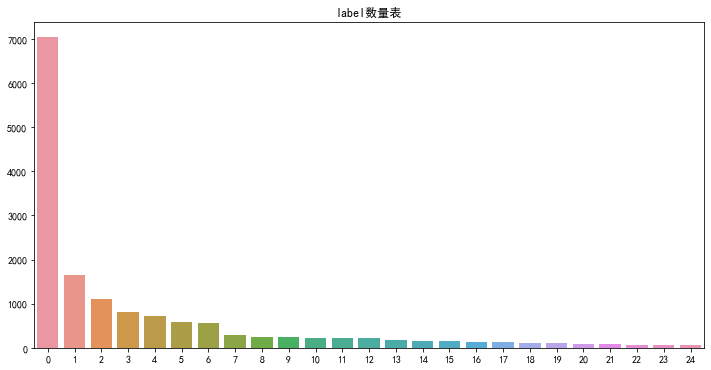

In [8]:
plt.figure(figsize=(12, 6))
plt.title("label数量表")
sns.barplot(x=train['label'].value_counts().index, y=train['label'].value_counts().values)
plt.show()

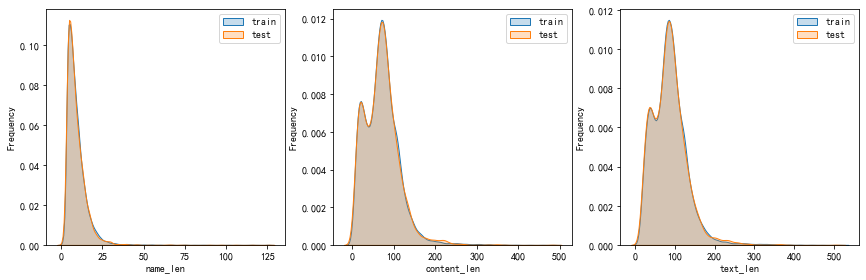

In [9]:
drop_col = 6
drop_row = 4
plt.figure(figsize=(5*drop_col, 5*drop_row))
for i, col in enumerate(['name_len', 'content_len', 'text_len']):
    ax = plt.subplot(drop_row, drop_col, i+1)
    ax = sns.kdeplot(train[col],  shade=True)
    ax = sns.kdeplot(test[col],  shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(['train', 'test'])
plt.show()

Index(['id', 'name', 'content', 'label', 'name_len', 'content_len', 'text',
       'text_len'],
      dtype='object')